# サンプルコード

 ## 準備まとめ

ダウンロードとインストール

In [1]:
!git clone https://github.com/ghmagazine/python_stat_sample.git
!mv ./python_stat_sample/data ./data
!pip install japanize-matplotlib

Cloning into 'python_stat_sample'...
remote: Enumerating objects: 130, done.
remote: Total 130 (delta 0), reused 0 (delta 0), pack-reused 130
Receiving objects: 100% (130/130), 8.22 MiB | 15.80 MiB/s, done.
Resolving deltas: 100% (59/59), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 4.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=a01982d521fc59daa4ceaecc93fdf9a4c31fec832de44661838917f73063dd57
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


インポートと設定

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

%precision 3
pd.set_option('precision', 3)

## 推測統計の全体像

母集団

In [3]:
all_scores = pd.read_csv('data/ch4_scores400.csv')['点数']
all_scores

0      76
1      55
2      80
3      80
4      74
       ..
395    77
396    60
397    83
398    80
399    85
Name: 点数, Length: 400, dtype: int64

標本抽出

In [ ]:
sample_scores = np.random.choice(all_scores, 20, replace=False)
sample_scores

array([43, 81, 70, 61, 77, 78, 54, 82, 67, 63, 67, 73, 47, 92, 70, 76, 91,
       56, 83, 79])

標本統計量

In [ ]:
sample_scores.mean(), sample_scores.var()

(70.500, 172.550)

抽出と統計量の計算を繰り返す

In [ ]:
for i in range(10):
    sample_scores = np.random.choice(all_scores, 20, replace=False)

    mean, std = sample_scores.mean(), sample_scores.std()
    print(f'{i + 1:02}回  平均: {mean:.1f}  標準偏差: {std:.2f}')

01回  平均: 72.8  標準偏差: 12.26
02回  平均: 67.1  標準偏差: 16.88
03回  平均: 69.5  標準偏差: 11.43
04回  平均: 67.5  標準偏差: 14.02
05回  平均: 67.3  標準偏差: 14.52
06回  平均: 70.1  標準偏差: 13.32
07回  平均: 68.8  標準偏差: 13.23
08回  平均: 66.0  標準偏差: 12.16
09回  平均: 69.8  標準偏差: 12.02
10回  平均: 64.8  標準偏差: 12.92


## 確率モデルの全体像

確率変数

In [4]:
p = np.random.randint(1, 7)
p

5

試行

In [5]:
[np.random.randint(1, 7) for _ in range(10)]

[4, 1, 2, 1, 5, 1, 1, 1, 2, 3]

### 確率分布



サイコロ



In [6]:
dice_df = pd.DataFrame(index=[1, 2, 3, 4, 5, 6])
dice_df['確率'] = 1 / 6
dice_df.T

,1,2,3,4,5,6
確率,0.167,0.167,0.167,0.167,0.167,0.167


確率分布の合計

In [7]:
dice_df['確率'].sum()

0.9999999999999999

コイン

In [ ]:
coin_df = pd.DataFrame(index=['表', '裏'])
coin_df['確率'] = 1 / 2
coin_df.T

,表,裏
確率,0.5,0.5


## いかさまサイコロ

我々は知ることができない，いかさまサイコロの確率分布

In [ ]:
roll_index = pd.Index([1, 2, 3, 4, 5, 6], name='出目')
loaded_dice_df = pd.DataFrame(index=roll_index)
loaded_dice_df['確率'] = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]
loaded_dice_df

,確率
出目,
1,0.048
2,0.095
3,0.143
4,0.190
5,0.238
6,0.286


いかさまサイコロを100回試行

In [ ]:
num_trial = 100
sample = np.random.choice(loaded_dice_df.index, num_trial, p=loaded_dice_df['確率'])
sample

array([6, 5, 5, 6, 5, 3, 6, 6, 6, 5, 2, 2, 4, 6, 3, 5, 4, 3, 5, 3, 6, 5,
       4, 5, 5, 4, 6, 6, 6, 6, 5, 4, 5, 2, 6, 6, 2, 6, 3, 6, 1, 5, 5, 5,
       1, 6, 6, 6, 3, 6, 2, 4, 5, 4, 5, 3, 5, 6, 6, 6, 3, 5, 4, 5, 1, 6,
       4, 2, 3, 3, 6, 5, 5, 6, 2, 6, 5, 6, 4, 6, 5, 5, 4, 4, 4, 3, 6, 3,
       6, 6, 3, 6, 2, 4, 6, 6, 1, 1, 1, 2])

100回試行時の度数分布表

In [ ]:
freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'度数': freq, '相対度数': freq / num_trial}, index=roll_index)

,度数,相対度数
出目,,
1,6,0.06
2,9,0.09
3,13,0.13
4,14,0.14
5,24,0.24
6,34,0.34


100回試行時のヒストグラム

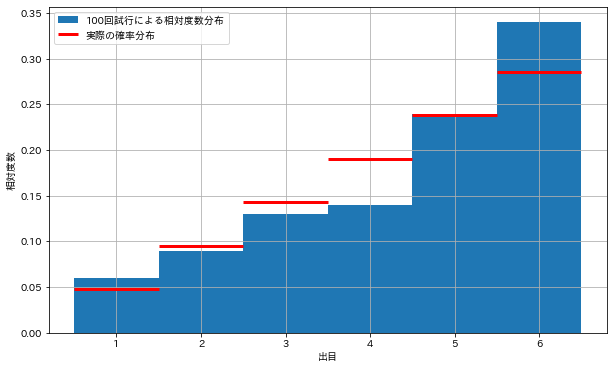

In [ ]:
def show_hist_loaded_dice():
    plt.figure(figsize=(10, 6))
    plt.hist(sample, bins=6, range=(1, 7), density=True, label=f'{num_trial}回試行による相対度数分布')
    plt.hlines(loaded_dice_df['確率'], np.arange(1, 7), np.arange(2, 8), color='red', lw=3, label='実際の確率分布')
    plt.xticks(np.linspace(1.5, 6.5, 6), labels=np.arange(1, 7))
    plt.xlabel('出目')
    plt.ylabel('相対度数')
    plt.legend()
    plt.grid(True)
    plt.show()

show_hist_loaded_dice()

5000回試行時のヒストグラム

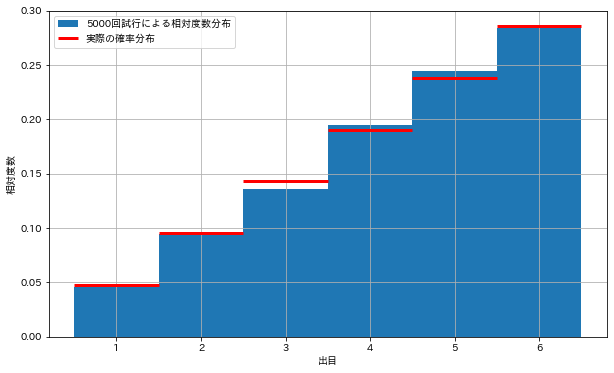

In [ ]:
num_trial = 5000
sample = np.random.choice(loaded_dice_df.index, num_trial, p=loaded_dice_df['確率'])

show_hist_loaded_dice()

## 推測統計と確率モデル

全生徒のヒストグラム（相対度数分布）

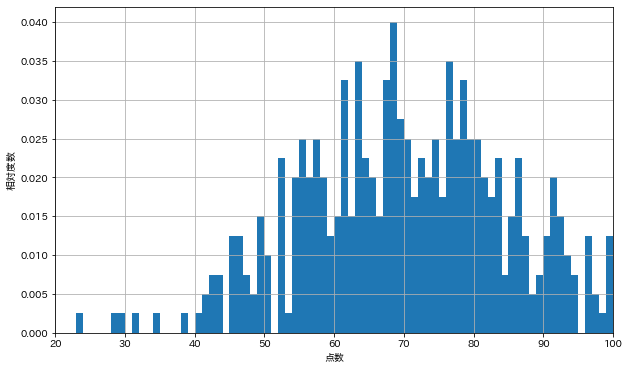

In [ ]:
def show_hist_scores(s):
    plt.figure(figsize=(10, 6))
    plt.hist(s, bins=100, range=(0, 100), density=True)
    plt.xlim(20, 100)
    plt.xlabel('点数')
    plt.ylabel('相対度数')
    plt.grid(True)
    plt.show()

all_scores = pd.read_csv('data/ch4_scores400.csv')['点数']
show_hist_scores(all_scores)

無作為抽出の試行1回

In [ ]:
np.random.choice(all_scores)

76

試行100回のヒストグラム

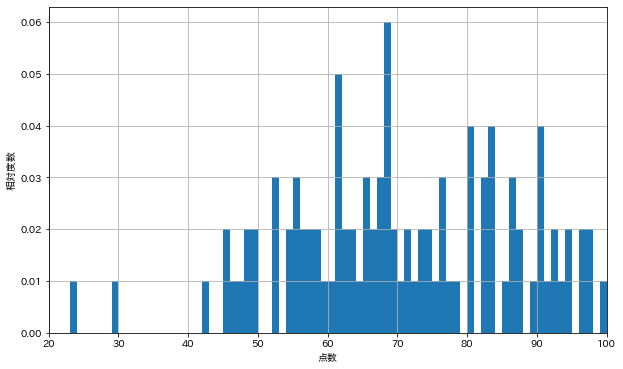

In [ ]:
scores = np.random.choice(all_scores, 100)
show_hist_scores(scores)

試行10000回のヒストグラム

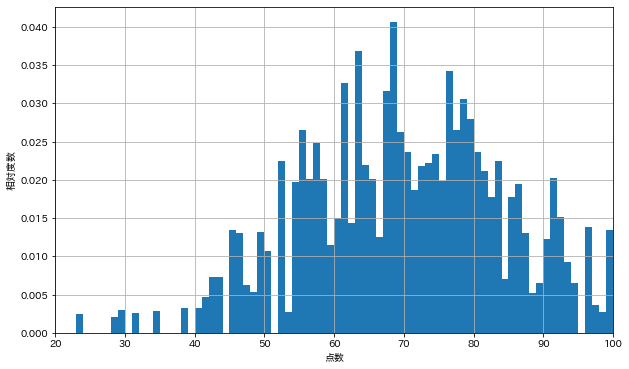

In [ ]:
scores = np.random.choice(all_scores, 10000)
show_hist_scores(scores)

## 標本平均という確率変数

20人分の標本平均の相対度数分布

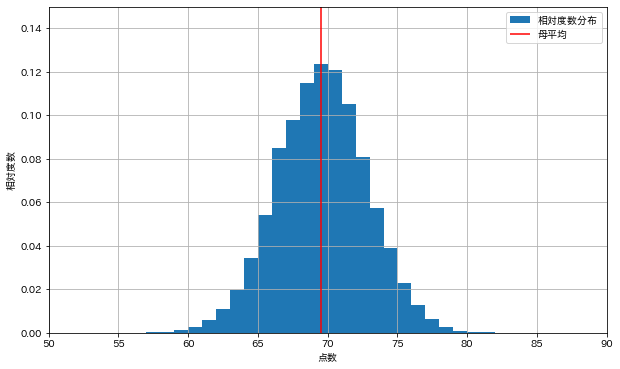

In [ ]:
sample_means = [np.random.choice(all_scores, 20).mean() for _ in range(10000)]

plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=100, range=(0, 100), density=True, label='相対度数分布')
plt.vlines(np.mean(all_scores), 0, 1, color='red', label='母平均')
plt.xlim(50, 90)
plt.ylim(0, 0.15)
plt.xlabel('点数')
plt.ylabel('相対度数')
plt.legend()
plt.grid(True)
plt.show()

# 離散型確率変数

## 1次元

### 確率質量関数

確率変数がとりうる値

In [ ]:
x_set = np.array([1, 2, 3, 4, 5, 6])

確率関数f

In [ ]:
def f(x):
    return x / 21 if x in x_set else 0

確率変数X

In [ ]:
X = [x_set, f]

確率分布

In [ ]:
prob = np.array([f(x) for x in x_set])
dict(zip(x_set, prob))

{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

確率の性質

In [ ]:
print(f'すべて0以上: {np.all(prob >= 0)}')
print(f'総和: {np.sum(prob):.3f}')

すべて0以上: True
総和: 1.000


### 累積分布関数

In [ ]:
def F(x):
    return np.sum([f(xx) for xx in x_set if xx  <= x])

F(4)

0.476

### 確率変数の変換

とりうる値を置き換えて確率分布を作成

In [ ]:
y_set = np.array([10 * xx - 10 for xx in x_set])
dict(zip(y_set, prob))

{0: 0.048, 10: 0.095, 20: 0.143, 30: 0.190, 40: 0.238, 50: 0.286}

### 期待値

いかさまサイコロXの期待値

In [ ]:
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(xx) * f(xx) for xx in x_set])

E(X)

4.333

確率変数Yの期待値

In [ ]:
E(X, g=lambda x: 10 * x - 10)

33.333

線形性の確認

In [ ]:
10 * E(X) - 10

33.333

### 分散

いかさまさいころXの分散

In [ ]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(xx) - mean) ** 2 * f(xx) for xx in x_set])

V(X)

2.222

確率変数Yの分散

In [ ]:
V(X, g=lambda x: 10 * x - 10)

222.222

分散の公式

In [ ]:
10 ** 2 * V(X)

222.222

## 2次元

### 同時確率分布

とりうる値を作成

In [3]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

print(f'Xのとりうる値: {x_set}')
print(f'Yのとりうる値: {y_set}')

Xのとりうる値: [ 2  3  4  5  6  7  8  9 10 11 12]
Yのとりうる値: [1 2 3 4 5 6]


確率分布を表示

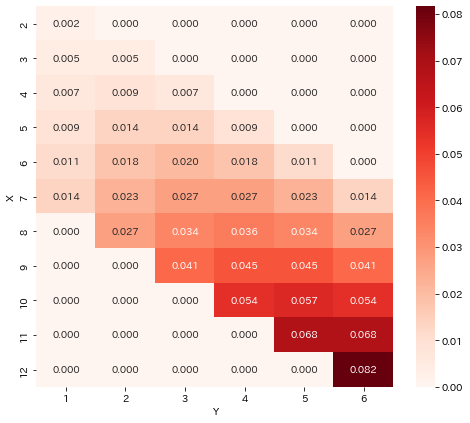

In [4]:
def f_XY(x, y):
    a, b = y, x - y
    if 1 <= a <= 6 and 1 <= b <= 6:
        return  a * b / (21 * 21)
    else:
        return 0

prob = np.array([[f_XY(i, j) for j in y_set] for i in x_set])
prob_df = pd.DataFrame(prob, index=pd.Index(x_set, name='X'), columns=pd.Index(y_set, name='Y'))

plt.figure(figsize=(8, 7))
sns.heatmap(prob_df, annot=True, fmt='1.3f', cmap='Reds')
plt.show()

確率の性質

In [5]:
print(f'すべて0以上: {np.all(prob >= 0)}')
print(f'総和: {np.sum(prob):.3f}')

すべて0以上: True
総和: 1.000


確率変数XY

In [6]:
XY = [x_set, y_set, f_XY]

### 周辺確率分布

周辺分布Xの抽出

In [7]:
prob_df.sum(axis=1).to_frame().T

X,2,3,4,5,6,7,8,9,10,11,12
0,0.002,0.009,0.023,0.045,0.079,0.127,0.159,0.172,0.166,0.136,0.082


周辺分布Yの抽出

In [8]:
prob_df.sum(axis=0).to_frame().T

Y,1,2,3,4,5,6
0,0.048,0.095,0.143,0.19,0.238,0.286


それぞれの周辺分布に従う確率変数X，Y

In [9]:
def f_X(x):
    return np.sum([f_XY(x, y) for y in y_set])

def f_Y(y):
    return np.sum([f_XY(x, y) for x in x_set])

X = [x_set, f_X]
Y = [y_set, f_Y]

周辺分布の表示

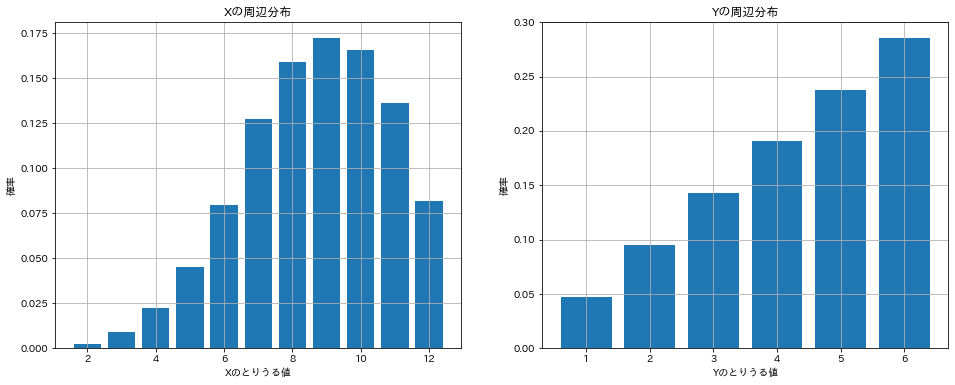

In [10]:
prob_x = np.array([f_X(k) for k in x_set])
prob_y = np.array([f_Y(k) for k in y_set])

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('Xの周辺分布')
ax1.set_xlabel('Xのとりうる値')
ax1.set_ylabel('確率')
ax1.grid()

ax2.bar(y_set, prob_y)
ax2.set_title('Yの周辺分布')
ax2.set_xlabel('Yのとりうる値')
ax2.set_ylabel('確率')
ax2.grid()

plt.show()

### 期待値

X，Yの期待値

In [28]:
def E2(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([[g(i, j) * f_XY(i, j) for i in x_set] for j in y_set])

mean_X = E2(XY, lambda x, y: x)
mean_Y = E2(XY, lambda x, y: y)
mean_X, mean_Y

(8.666666666666666, 4.333333333333333)

期待値の合計

In [12]:
E2(XY, lambda x, y: x + y)

13.0

期待値の線形性

In [15]:
mean_X + mean_Y

13.0

### 分散

X，Yの分散

In [16]:
def V2(XY, g):
    x_set, y_set, f_XY = XY
    mean = E2(XY, g)
    return np.sum([[(g(i, j) - mean) ** 2 * f_XY(i, j) for i in x_set] for j in y_set])

var_X = V2(XY, lambda x, y: x)
var_Y = V2(XY, lambda x, y: y)
var_X, var_Y

(4.444444444444445, 2.2222222222222223)

共分散

In [21]:
def cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E2(XY, lambda x, y: x)
    mean_Y = E2(XY, lambda x, y: y)
    return np.sum([[(i - mean_X) * (j - mean_Y) * f_XY(i, j) for i in x_set] for j in y_set])

cov_XY = cov(XY)
cov_XY

2.222222222222222

### 相関係数

In [23]:
def corr(XY):
    cov_xy = cov(XY)
    var_x = V2(XY, lambda x, y: x)
    var_y = V2(XY, lambda x, y: y)

    return cov_xy / np.sqrt(var_x * var_y)

corr(XY)

0.7071067811865474